In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## EDA

In [3]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

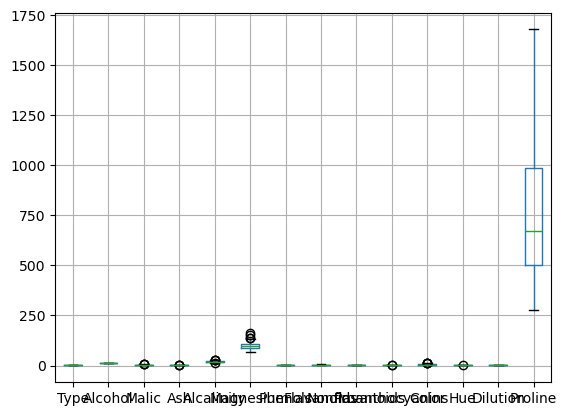

In [4]:
# We can see outliers 
df.boxplot()
plt.show()

## Outlier analysis and removal

In [5]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1

In [6]:
lower_extreme=q1-1.5*IQR
upper_extreme=q3+1.5*IQR
print(lower_extreme ,upper_extreme)

Type                -2.00000
Alcohol             10.39000
Malic               -0.61750
Ash                  1.68875
Alcalinity          10.75000
Magnesium           59.50000
Phenols              0.15625
Flavanoids          -1.30000
Nonflavanoids        0.01875
Proanthocyanins      0.20000
Color               -1.25000
Hue                  0.27625
Dilution             0.08875
Proline           -226.25000
dtype: float64 Type                  6.00000
Alcohol              15.65000
Malic                 5.30250
Ash                   3.07875
Alcalinity           27.95000
Magnesium           135.50000
Phenols               4.38625
Flavanoids            5.38000
Nonflavanoids         0.68875
Proanthocyanins       3.00000
Color                10.67000
Hue                   1.62625
Dilution              5.01875
Proline            1711.75000
dtype: float64


In [7]:
df_no_outlier = df[(df>= lower_extreme) & (df <= upper_extreme)]

In [8]:
df = df[(df >= lower_extreme) & (df <= upper_extreme)]
print("DataFrame without outliers:")
print(df)

DataFrame without outliers:
     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6      127.0     2.80        3.06   
1       1    13.20   1.78  2.14        11.2      100.0     2.65        2.76   
2       1    13.16   2.36  2.67        18.6      101.0     2.80        3.24   
3       1    14.37   1.95  2.50        16.8      113.0     3.85        3.49   
4       1    13.24   2.59  2.87        21.0      118.0     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71    NaN  2.45        20.5       95.0     1.68        0.61   
174     3    13.40   3.91  2.48        23.0      102.0     1.80        0.75   
175     3    13.27   4.28  2.26        20.0      120.0     1.59        0.69   
176     3    13.17   2.59  2.37        20.0      120.0     1.65        0.68   
177     3    14.13   4.10  2.74        24.5       96.0     2.05        0.76   

     Nonflavanoids  Pro

In [9]:
df.boxplot()


<Axes: >

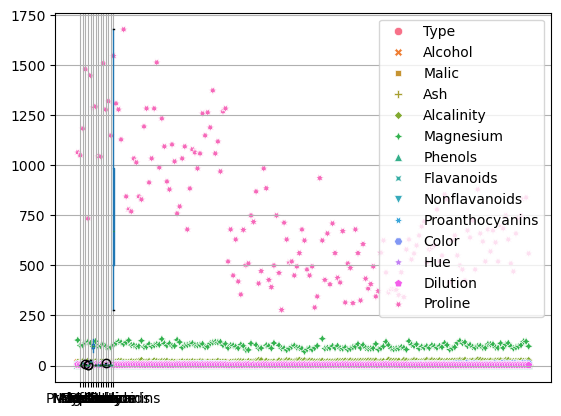

In [10]:
sns.scatterplot(data=df)
plt.show()

In [11]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              3
Ash                3
Alcalinity         4
Magnesium          4
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    2
Color              4
Hue                1
Dilution           0
Proline            0
dtype: int64

In [12]:
df.fillna(df.mean(),inplace=True)

In [13]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

## PCA

In [14]:
features=df

In [15]:
# Standardize the features
scaler = StandardScaler()
new_features = scaler.fit_transform(features)

In [16]:
np.std(new_features)

0.9999999999999999

In [17]:
pca=PCA(n_components=10)

In [18]:
pca.fit(features)

PCA(n_components=10)

In [19]:
new_features=pca.transform(new_features)
#new_xtest=pca.transform(xtest)

C:\Anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [20]:
#  Determine the optimal number of principal components
#  Explained variance ratio
explained_variance = pca.explained_variance_ratio_

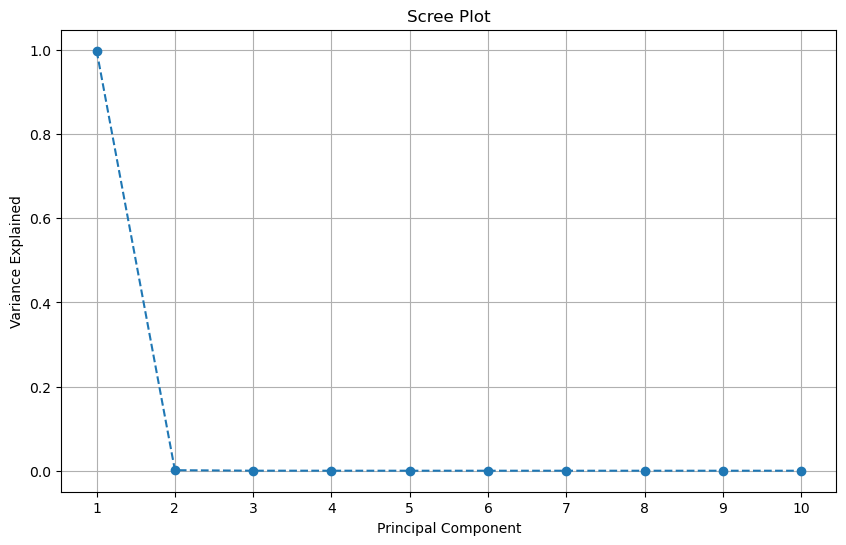

In [21]:
# b. Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(np.arange(1, len(explained_variance) + 1, 1))
plt.grid()
plt.show()

## Kmeans for Original dataset

In [22]:
kmeans= KMeans(n_clusters=2)

In [23]:
cluster=kmeans.fit(features)
cluster.labels_

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [24]:
np.unique(cluster.labels_)

array([0, 1])

In [25]:
df['clusters']= cluster.labels_

In [26]:
df[df.clusters==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
4,1,13.24,2.590000,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
19,1,13.64,3.100000,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,0
20,1,14.06,1.630000,2.28,16.0,126.0,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,0
21,1,12.93,3.800000,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,0
24,1,13.50,1.810000,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.279486,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,0
174,3,13.40,3.910000,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,0
175,3,13.27,4.280000,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,0
176,3,13.17,2.590000,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,0


In [27]:
sl_score_old=silhouette_score(features,cluster.labels_)
sl_score_old

0.6576463644439642

## Kmeans for transformed dataset

In [28]:
cluster=kmeans.fit(new_features)
cluster.labels_

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [29]:
np.unique(cluster.labels_)

array([0, 1])

In [30]:
df['clusters']= cluster.labels_

In [31]:
df[df.clusters==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1,14.23,1.71,2.430000,15.600000,127.000000,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.140000,11.200000,100.000000,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.670000,18.600000,101.000000,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.500000,16.800000,113.000000,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.870000,21.000000,118.000000,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2,12.99,1.67,2.600000,19.382184,98.655172,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,0
74,2,11.96,1.09,2.300000,21.000000,101.000000,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,0
98,2,12.37,1.07,2.100000,18.500000,88.000000,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,0
109,2,11.61,1.35,2.700000,20.000000,94.000000,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680,0


In [32]:
sl_score_new=silhouette_score(new_features,cluster.labels_)
sl_score_new

0.3095140258941178

In [33]:
sl_score_new-sl_score_old

-0.3481323385498464

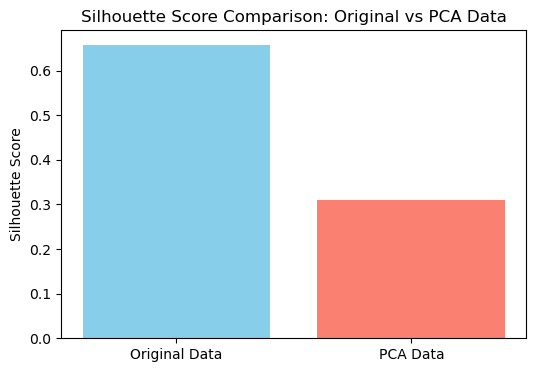

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_original = sl_score_old
silhouette_pca = sl_score_new


scores = {'Original Data': silhouette_original, 'PCA Data': silhouette_pca}


plt.figure(figsize=(6, 4))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Comparison: Original vs PCA Data')
plt.show()


In [35]:
# As we compare the silhouette_score before and after PCA we can understand that, there is an decrement in it.

1. Key Findings and Insights
 - Dimensionality Reduction: Applying PCA to reduce the dataset's dimensionality resulted in a more compact representation of the data.
 - Clustering Quality: By comparing Silhouette scores, clustering on PCA-transformed data was evaluated against clustering on the original data. 
 - Computational Efficiency: Clustering on the PCA-reduced dataset was computationally faster, as PCA reduced the feature space, requiring less processing power and storage.
2. Practical Implications of Using PCA and Clustering
 - Enhanced Interpretability: PCA reduces complexity by focusing on the most important features.
 - Noise Reduction: PCA can help to remove noisy features that don’t contribute significantly to the data's variance. 
 - Efficiency in Large Datasets: By reducing the number of features, PCA decreases the computational burden, which is advantageous when working with large datasets, especially in real-time or resource-constrained applications.
3. Recommendations for Using PCA and Clustering
 - Use PCA when the dataset has a high number of features, as it helps simplify the dataset while retaining the most crucial information.
 - Apply clustering on PCA-transformed data if the clustering results on the original data are poor (e.g., low Silhouette score) or if clustering directly on high-dimensional data is computationally challenging.